# Hacktiv8 Introduction to Data Science - Sesi 5

Sesi 5:

- Data Cleaning with Pandas

In [1]:
#import library, Pandas and Numpy
import numpy as np
import pandas as pd

In [2]:
#import dataset from datasets forder
df = pd.read_csv('datasets/property_data.csv')

In [4]:
#saw dataset 10 row awal
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [20]:
#rangkuman keseluruhan data
## df.describe()
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [5]:
#read ST_NUM 
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
#read dari ST_NUM yang kosong / isnull
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [8]:
#read dari NUM_BEDROOMS
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [9]:
#read dari NUM_BEDROOMS yang kosong
#pandas hanya membaca auto missing value itu 'NA' 
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [10]:
#make a list of missing_values variable
missing_value = ['n/a', 'na', '--']

In [11]:
#na_values yaitu yang barupa isnull/missing value
#read na_values as missing_value list 
df = pd.read_csv('datasets/property_data.csv', na_values = missing_value)

In [12]:
#now read num_bedroom missing value
#yang berupa na, -- pun terbaca as missing value
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [17]:
df['SQ_FT'].isnull()

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7     True
8    False
Name: SQ_FT, dtype: bool

In [21]:
#read own_occupied
df['OWN_OCCUPIED']

# data type is object but there is '12' in the data

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [22]:
#read isnull
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [23]:
# unutk own occupied harusnya type numerik is missing value, 
# so need to change it
# 1. loop own occupied 
cnt = 0
for row in df['OWN_OCCUPIED']:                  #untuk row OWN_OCCUPIED di dalam df
    try:                                        # exception handling
        int(row)                                #inteter row
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan      #maka jadi nan 
    except ValueError:                          #if not makan error
        pass                                    #
    cnt+=1                                      #loop ke next row

In [24]:
#read df again after int(row ) > np.nan
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Sumarizing Missing Values

In [25]:
#summary nya 
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [26]:
#read any values hilang sekeluruhan, apakah ada ?
df.isnull().values.any()

True

In [27]:
df.isnull().sum().sum()

12

## Replacing

In [28]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [29]:
#dengan fillna fill in missing valuse dengan 125
df['ST_NUM'].fillna(125, inplace=True)

In [30]:

df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [31]:
#replce isnull dalam ST_NUM, dengan cara imputasi lokasi basis di dalam ST_NUM
df.loc[2, 'ST_NUM'] = 280               #dataframe.loc[index, collumn name] = inreplace single values

In [32]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,280.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [35]:
#caunt nilai median dari NUM_BEDROOMS
median = df['NUM_BEDROOMS'].median()
median

3.0

In [37]:
#count mean/ rata rata 
meann =df['NUM_BEDROOMS'].mean()
meann

2.6666666666666665

In [34]:
#replace, fill na with median dalam column bedrooms
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [50]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
2,100003000.0,280.0,LEXINGTON,N,3.0,1,850.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [43]:
# delete all isnull
# drop semua columns yg ada missing values 
df1 = df.dropna(axis=1)

In [47]:
# delete all with isnull
df2 = df.dropna(inplace=True)

In [49]:
print(df2)

None


In [44]:
df1.head(10)

,ST_NUM,ST_NAME,NUM_BEDROOMS
0,104.0,PUTNAM,3.0
1,197.0,LEXINGTON,3.0
2,280.0,LEXINGTON,3.0
3,201.0,BERKELEY,1.0
4,203.0,BERKELEY,3.0
5,207.0,BERKELEY,3.0
6,125.0,WASHINGTON,2.0
7,213.0,TREMONT,3.0
8,215.0,TREMONT,3.0


## Analyzing Obesity in England

In [28]:
%matplotlib inline

In [40]:
#read data obes.xls

data = pd.ExcelFile('datasets/obes.xls')

In [51]:
#read sheet names 
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [31]:
#focuss oon 7.2 sheet/ 
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [52]:
#focuss oon 7.2 sheet/ 
data_age = data.parse('7.2', skiprows=4, skipfooter=14,)

In [53]:
#unread colom 1, pada file sheet 7.2
data_age1 = data.parse('7.2', index_col=1, skiprows=4, skipfooter=14,)

In [55]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [56]:
#rename header to year
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)             #empty row drop 

In [57]:
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [58]:
#delate/ drop isnull values yang ada di table data_age
data_age.dropna(inplace=True)

In [59]:
data_age.head(10)

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [62]:
#read data by index
data_age.iloc[1,1]

1711.0

In [63]:
#index dari data kita ubah jadi yang Years
data_age.set_index('Year', inplace=True)

In [64]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [65]:
#read data by index
data_age.iloc[1,1]

579.0

<AxesSubplot:xlabel='Year'>

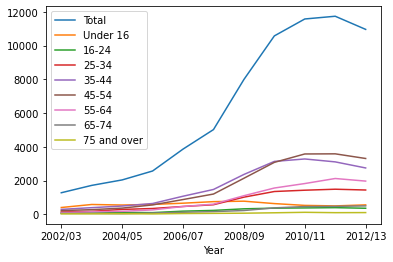

In [66]:
#membuat plot dg matplotlib 
data_age.plot()

In [67]:
#drop untuk table total, using new dataframe name as data_age_minus_total
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

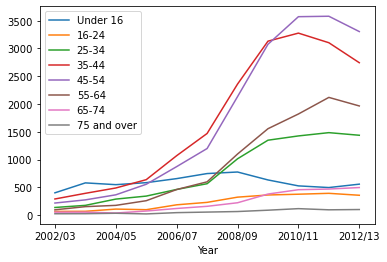

In [68]:
#plot data_agme_minus_total
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

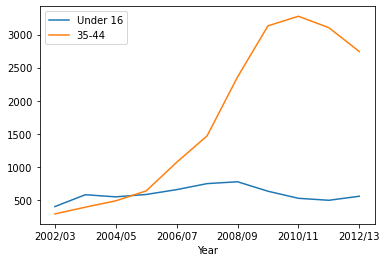

In [71]:
#read data under 16, dalam plot 
#read data 35-44 , dalam artian dia yg dewasa 
data_age['Under 16'].plot(label='Under 16', legend=True)            #legend auto desc element in the plot  
data_age['35-44'].plot(label='35-44', legend=True)

## Time Series

In [72]:
from datetime import datetime

In [73]:
#create data range dataset
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')  #(start=tglmulai, end= berakih, freq= D/ H/ 5H/3D, tz=timezone) 

In [75]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [76]:
#timestamp kita taroh ralam dataframe df
df = pd.DataFrame(date_rng, columns=['date'])

In [77]:
#add more columns to df, with random value
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))        #random valuse from 0 to 100 yang ururannya as len date_rng

In [78]:
df.head()

,date,data
0,2020-01-01 00:00:00,33
1,2020-01-01 01:00:00,16
2,2020-01-01 02:00:00,76
3,2020-01-01 03:00:00,78
4,2020-01-01 04:00:00,40


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [80]:
#read date to padas
df['date'] = pd.to_datetime(df['date'])

In [81]:
#index from df is become data
df = df.set_index('date')

In [82]:
df.head()

,data
date,
2020-01-01 00:00:00,33
2020-01-01 01:00:00,16
2020-01-01 02:00:00,76
2020-01-01 03:00:00,78
2020-01-01 04:00:00,40


In [83]:
#date_rng become string
string_date_rng = [str(x) for x in date_rng]

In [84]:
print(string_date_rng)

['2020-01-01 00:00:00', '2020-01-01 01:00:00', '2020-01-01 02:00:00', '2020-01-01 03:00:00', '2020-01-01 04:00:00', '2020-01-01 05:00:00', '2020-01-01 06:00:00', '2020-01-01 07:00:00', '2020-01-01 08:00:00', '2020-01-01 09:00:00', '2020-01-01 10:00:00', '2020-01-01 11:00:00', '2020-01-01 12:00:00', '2020-01-01 13:00:00', '2020-01-01 14:00:00', '2020-01-01 15:00:00', '2020-01-01 16:00:00', '2020-01-01 17:00:00', '2020-01-01 18:00:00', '2020-01-01 19:00:00', '2020-01-01 20:00:00', '2020-01-01 21:00:00', '2020-01-01 22:00:00', '2020-01-01 23:00:00', '2020-01-02 00:00:00', '2020-01-02 01:00:00', '2020-01-02 02:00:00', '2020-01-02 03:00:00', '2020-01-02 04:00:00', '2020-01-02 05:00:00', '2020-01-02 06:00:00', '2020-01-02 07:00:00', '2020-01-02 08:00:00', '2020-01-02 09:00:00', '2020-01-02 10:00:00', '2020-01-02 11:00:00', '2020-01-02 12:00:00', '2020-01-02 13:00:00', '2020-01-02 14:00:00', '2020-01-02 15:00:00', '2020-01-02 16:00:00', '2020-01-02 17:00:00', '2020-01-02 18:00:00', '2020-01-0

In [85]:
#sting vecome timestramps
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [86]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [88]:
#make  string date
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [89]:
# change become timestamp
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]

In [90]:
#read as times
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [93]:
#add into data frame 
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])          #when creade new dataframe = pd.DaataFrame(datalist , columns name)

In [94]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [104]:
#going to see data only from 2sd day every mo
# df[df.index.day == 5]           #dataframe[df.index.day] read from every day
df[df.index.month == 2]            #read from every month

,data
date,


In [101]:
#read from day from index of df
df['2020-01-03']

,data
date,
2020-01-03 00:00:00,80
2020-01-03 01:00:00,46
2020-01-03 02:00:00,48
2020-01-03 03:00:00,76
2020-01-03 04:00:00,84
2020-01-03 05:00:00,83
2020-01-03 06:00:00,89
2020-01-03 07:00:00,81
2020-01-03 08:00:00,9


In [105]:
#range datetime tertentu 
df['2020-01-03':'2020-01-05']       #df dtart :stop 

,data
date,
2020-01-03 00:00:00,80
2020-01-03 01:00:00,46
2020-01-03 02:00:00,48
2020-01-03 03:00:00,76
2020-01-03 04:00:00,84
...,...
2020-01-05 19:00:00,67
2020-01-05 20:00:00,86
2020-01-05 21:00:00,16


In [106]:
#read mean from Day
df.resample('D').mean()

,data
date,
2020-01-01,56.833333
2020-01-02,40.625000
2020-01-03,53.708333
2020-01-04,49.208333
2020-01-05,47.250000
2020-01-06,42.875000
2020-01-07,59.791667
2020-01-08,43.000000


In [107]:
#rolling sum tapi bisa juga kita rollong mean 
df['rolling_sum'] = df.rolling(3).sum()

In [108]:
df.head()

,data,rolling_sum
date,,
2020-01-01 00:00:00,33,NaN
2020-01-01 01:00:00,16,NaN
2020-01-01 02:00:00,76,125.0
2020-01-01 03:00:00,78,170.0
2020-01-01 04:00:00,40,194.0


In [109]:
#count nilai yang valid 
df['rolling_sum_backfill'] = df['rolling_sum'].fillna(method='backfill')

In [110]:
df.head()

,data,rolling_sum,rolling_sum_backfill
date,,,
2020-01-01 00:00:00,33,NaN,125.0
2020-01-01 01:00:00,16,NaN,125.0
2020-01-01 02:00:00,76,125.0,125.0
2020-01-01 03:00:00,78,170.0,170.0
2020-01-01 04:00:00,40,194.0,194.0


## Time Series on Dataset

In [111]:
#read data set 
opsd_daily = pd.read_csv('datasets/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [112]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [113]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [114]:
#kolom date as index 
opsd_daily.set_index('Date', inplace=True)

In [115]:
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [117]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2+ KB


In [119]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [120]:
#menggunakan index_col 0 (index peertama, atau colom pertama di file datase yang akan ga di baca direcly ketika baca data )
opsd_daily = pd.read_csv('datasets/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [97]:
#
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [121]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
